<a href="https://colab.research.google.com/github/KaueAbbe/Projeto-Estude_Python/blob/main/Estude%20Machine%20Learning/Previsao/Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size = 8 color = 'darkblue'> Machine Learnig - Detalhando Classificação</font>

#Sobre o Autor e o Notebook
Neste notebook contém estudos a respeito da técnica de classificação de Machine Learning, utilizando a biblioteca scikit-learn.

Este notebook possuirá diversas referencias, sendo uma delas o curso de machine learning da Alura. No entanto o autor tem suas informações detalhadas abaixo.

<font size =4> **Autor:** Kaue Hermann Abbehausen</font>

<font size =4> **Linkedin:** https://www.linkedin.com/in/kaue-abbehausen-5b1922165/</font>


<font size = 5 color = 'Black'> Sobre os dados</font>

Os dados que serão utilizados é de comportamento do cliente adentrando páginas de um site e avaliando se ele comprou ou não o produto. O que queremos é criar um modelo que informe se o cliente comprará ou não certo produto.

A base de dados que será utilizada neste notebook se encontra no link abaixo:
* [DADOS NO GITHUB](https://https://github.com/KaueAbbe/Projeto-Estude_Python/tree/main/Estude%20Machine%20Learning/dados)

# Importando biblioteca e dados

In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/KaueAbbe/Projeto-Estude_Python/main/Estude%20Machine%20Learning/dados/acesso.csv'
acesso = pd.read_csv(url)

In [3]:
acesso.head(10)

,acessou_home,acessou_como_funciona,acessou_contato,comprou
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0
5,1,0,1,1
6,1,1,0,0
7,1,0,1,1
8,1,1,0,0
9,1,0,1,1


 * 1 - Significa Sim
 * 0 - Significa Não

# Leve análise exploratória

In [9]:
acesso.groupby('comprou').sum()

,acessou_home,acessou_como_funciona,acessou_contato
comprou,,,
0,21,34,31
1,32,6,31


<Figure size 720x432 with 0 Axes>

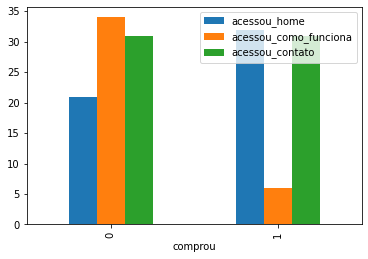

<Figure size 720x432 with 0 Axes>

In [5]:
acesso.groupby('comprou').sum().plot(kind = 'bar')
plt.figure(figsize = (10,6))

A maioria dos clientes que acessam como funciona não compram

# Criando o 1º modelo
Este modelo é um modelo básico para compreender os detalhes da criação de um modelo. Nas atividades seguintes estarão outros modelos com outros dados que tem o papel de fixar o conhecimento e debater outros assuntos.

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [15]:
x = acesso.drop('comprou', axis = 1)
y = acesso.comprou

In [16]:
x.head()

,acessou_home,acessou_como_funciona,acessou_contato
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


In [17]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: comprou, dtype: int64

In [19]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [20]:
modelo = MultinomialNB()

In [21]:
modelo.fit(x_treino, y_treino)

MultinomialNB()

In [28]:
acuracia = modelo.score(x_teste, y_teste)*100
print(f'A acurácia foi de {round(acuracia,2)}%')

A acurácia foi de 86.67%


# Variáveis Categóricas
Para entender variáveis categóricas vamos analisar o dataset abaixo, focando na coluna busca

In [42]:
busca = pd.read_csv('busca.csv')
busca.head()

,home,busca,logado,comprou
0,0,algoritmos,1,1
1,0,java,0,1
2,1,algoritmos,0,1
3,1,ruby,1,0
4,1,ruby,0,1


In [43]:
busca.busca.unique()

array(['algoritmos', 'java', 'ruby'], dtype=object)

Temos 3 valores únicos nesta variávels e queremos transforma-los em valores binários (0,1) para colocarmos no nosso modelo. O pandas consegue fazer isto para nós utilizando get_dummies. O dummies vem do fato de que a coluna busca será transformada em outras 3 colunas, chamadas de variáveis dummies.

In [44]:
buscaDummies = pd.get_dummies(busca)
buscaDummies.head()

,home,logado,comprou,busca_algoritmos,busca_java,busca_ruby
0,0,1,1,1,0,0
1,0,0,1,0,1,0
2,1,0,1,1,0,0
3,1,1,0,0,0,1
4,1,0,1,0,0,1


Agora que temos nossos valores binários podemos utilizá-lo parar criar nosso algoritmo.

In [45]:
x = buscaDummies.drop('comprou', axis = 1)
y = buscaDummies.comprou
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.3, random_state = 42)
modelo = MultinomialNB()
modelo.fit(x_treino, y_treino)
acuracia = modelo.score(x_teste, y_teste)*100
print(f'A acurácia foi de {round(acuracia,2)}%')

A acurácia foi de 83.33%
